# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Pratik Chavan

ID:1001963580

Team Mate name 1 : Harshini Kandimalla

ID:1001960046

Team Mate name 2: Pratik Patekar

ID:1001937948

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files(clustering.csv and college.csv).<br>
Output variable for clustering.csv - Class (<=50K and >50K)<br>
Output variable for college.csv - Grad.Rate (<=50 and >50k)<br>

You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

# Importing the dataset

In [3]:
dataset = pd.read_csv("clusteringdata.csv")
dataset.head(10)

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Preprocessing

In [4]:
# There are missing values and duplicates in the dataset so we need to deal with them before wo start.
print("Duplicates in the Dataset")
print(dataset.duplicated().sum())
#We have 1 duplicate values so we have remove it.
dataset = dataset.drop_duplicates()
print("Duplicates after droping duplicates")
print(dataset.duplicated().sum())

#Checking for null values in dataset
dataset.isnull().sum(axis = 0)

# We have "?" values in the dataset rows so we are going to remove them
dataset = dataset[dataset.WorkClass != ' ?']
dataset = dataset[dataset.Occupation != ' ?']
dataset = dataset[dataset.NativeCountry != ' ?']

Duplicates in the Dataset
1
Duplicates after droping duplicates
0


In [5]:
#Output variable for clustering.csv - Class (<=50K and >50K)
from sklearn.preprocessing import LabelEncoder
dataset['Class'] = dataset['Class'].map({' <=50K':0, ' >50K':1})

#Changing the Categorical Values to Numerical values
features = list(dataset.select_dtypes(include=['object']).columns)
le_feat = {}

for i, feature in enumerate(features):
    #Converting labesl into numeric forms
    le_feat[feature] = LabelEncoder() 
    #fitting the dataset
    dataset[feature] = le_feat[feature].fit_transform(dataset[feature])
dataset.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,36,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,36,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,36,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,36,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

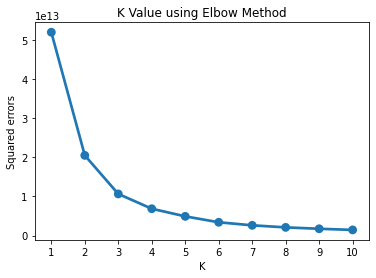

In [6]:
#########################begin code for Task 1-a
sse = {}

for k in range(1, 11):     
    kmeansModel = KMeans(n_clusters=k, random_state=2022)     
    kmeansModel.fit(dataset)     
    sse[k] = kmeansModel.inertia_ 

    
plt.title('K Value using Elbow Method') 
plt.xlabel('K'); 
plt.ylabel('Squared errors') 

sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
plt.show() 
#########################begin code for Task 1-a


# We have to use the value at the elbow of the graph to get the best k values.
# So by observing the graph we can say that K is 3


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [7]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!

# Storing all columns except Class in X
X = dataset.drop(columns = ['Class'])

# storing the column Class in Y
Y = dataset['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 2022)

###################end code for Task 1-b-1

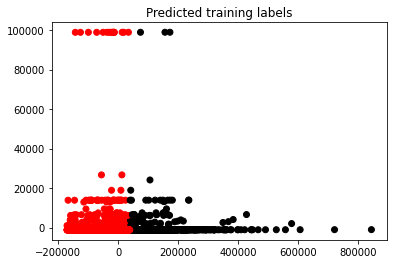

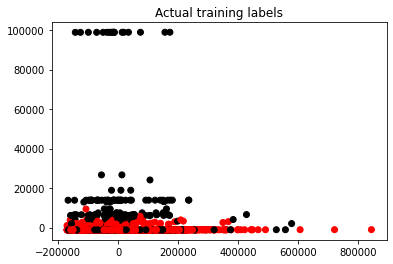

In [8]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeansModel = KMeans(n_clusters= 2)
kmeansModel.fit(X_train, Y_train)

# Compute cluster centers and predict cluster index for each sample 
clusters_centers = kmeansModel.fit_predict(X_train)

# Model and fit the data to the PCA model
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

colors = ['red', 'black']
plt.title("Predicted training labels")
plt.scatter(x,y,c=clusters_centers,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

plt.title("Actual training labels")
plt.scatter(x,y,c=Y_train,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()


###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

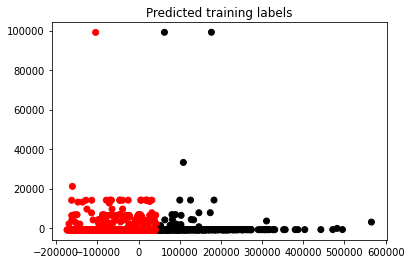

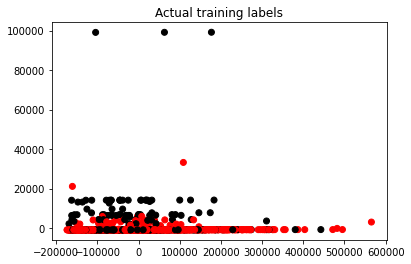

In [9]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
# predict cluster index for each sample 
cluster_testing = kmeansModel.fit_predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
### scatter(x, y, your_data)

plt.title("Predicted training labels")
plt.scatter(x,y,c=cluster_testing,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

plt.title("Actual training labels")
plt.scatter(x,y,c=Y_test,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()
###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [34]:
###################begin code for Task 1-b-4: Print out a confusion matrix
Y_prediction = kmeansModel.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_prediction),'\n')
###################end code for Task 1-b-4

Confusion Matrix:
 [[702 308]
 [278  86]] 



# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [11]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)
print(pdm_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
complete_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage="complete")
prediction1 = complete_cosine.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
prediction2 = complete_euclidean.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage="complete")
prediction3 = complete_manhattan.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
average_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage="average")
prediction4 = average_cosine.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="average")
prediction5 = average_euclidean.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage="average")
prediction6 = average_manhattan.fit_predict(X_train)

print("*"*100)
print("F1-score for complete linkage + cosine",f1_score(Y_train, prediction1))
print("F1-score for complete linkage + euclidean", f1_score(Y_train, prediction2))
print("F1-score for complete linkage + manhattan",f1_score(Y_train, prediction3))
print("F1-score for average linkage + cosine", f1_score(Y_train, prediction4))
print("F1-score for average linkage + euclidean", f1_score(Y_train, prediction5))
print("F1-score for average linkage + manhattan", f1_score(Y_train, prediction6))


###################end code for Task 2-a

[[     0.          98437.00161525  33544.00403947 ... 140287.00528203
  119351.00105571 131412.00140398]
 [ 98437.00161525      0.          64893.00575563 ...  41850.03189963
   20914.01553982  32975.0085671 ]
 [ 33544.00403947  64893.00575563      0.         ... 106743.00385505
   85807.00008741  97868.00173703]
 ...
 [140287.00528203  41850.03189963 106743.00385505 ...      0.
   20936.02025219   8875.1130697 ]
 [119351.00105571  20914.01553982  85807.00008741 ...  20936.02025219
       0.          12061.01587761]
 [131412.00140398  32975.0085671   97868.00173703 ...   8875.1130697
   12061.01587761      0.        ]]
****************************************************************************************************
F1-score for complete linkage + cosine 0.39187155042649274
F1-score for complete linkage + euclidean 0.009876543209876543
F1-score for complete linkage + manhattan 0.007490636704119849
F1-score for average linkage + cosine 0.39066030630178256
F1-score for average linkage 

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

# The best model here is euclidean complete.

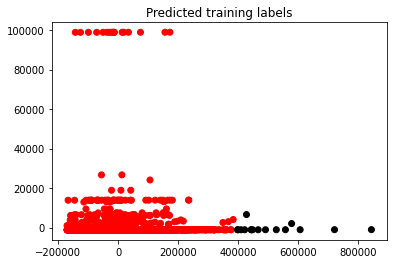

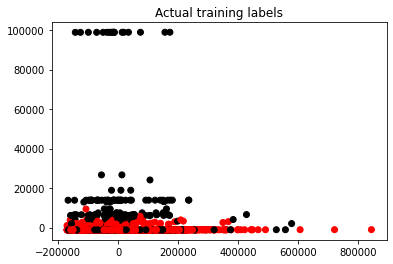

In [12]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
# Model and fit the data to the PCA model

X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
# scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

# Plotting the euclidean complete since it is the best model
plt.scatter(x,y,c=prediction2,cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Predicted training labels")
plt.show()

# plotting the Actual Training data
plt.scatter(x,y,c=Y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Actual training labels")
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

In [13]:
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
X = dataset[dataset.columns[:-1]]
Y = dataset[dataset.columns[-1]]
complete_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage="complete")
pred1 = complete_cosine.fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
pred2 = complete_euclidean.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage="complete")
pred3 = complete_manhattan.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
average_cosine = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage="average")
pred4 = average_cosine.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="average")
pred5 = average_euclidean.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_manhattan = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage="average")
pred6 = average_manhattan.fit_predict(X)

print("F1-score for complete linkage + cosine",f1_score(Y, pred1))
print("F1-score for complete linkage + euclidean", f1_score(Y, pred2))
print("F1-score for complete linkage + manhattan",f1_score(Y, pred3))
print("F1-score for average linkage + cosine", f1_score(Y, pred4))
print("F1-score for average linkage + euclidean", f1_score(Y, pred5))
print("F1-score for average linkage + manhattan", f1_score(Y, pred6))

F1-score for complete linkage + cosine 0.008598452278589854
F1-score for complete linkage + euclidean 0.005128205128205128
F1-score for complete linkage + manhattan 0.005128205128205128
F1-score for average linkage + cosine 0.3979002624671916
F1-score for average linkage + euclidean 0.0
F1-score for average linkage + manhattan 0.0


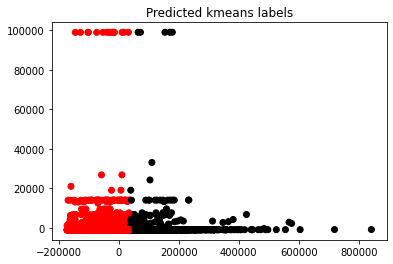

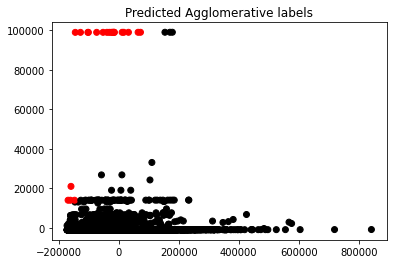

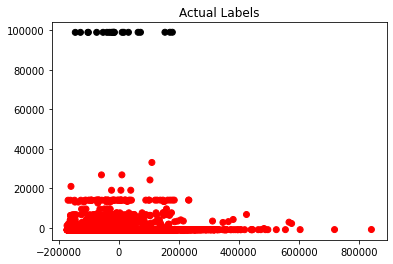

In [17]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

kmeans_prediction = kmeansModel.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
Agg_clustering = AgglomerativeClustering(n_clusters=2)
Agg_prediction = Agg_clustering.fit_predict(X)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = pca.fit_transform(X)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
# Adjust layout
x = X_pca[:, 0]
y = X_pca[:, 1]

#Plotting the scatter plot for predicted training label using kmeans clustering
plt.scatter(x,y,c=kmeans_prediction, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Predicted kmeans labels")
plt.show()

#Plotting the scatter plot for predicted training label using Agglomerative clustering 
plt.scatter(x,y,c=pred4, cmap=matplotlib.colors.ListedColormap(colors))
plt.title("Predicted Agglomerative labels")
plt.show()

#Plotting the scatter plot for test
plt.title("Actual Labels")
plt.scatter(x,y,c=y,cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [31]:
###################begin code for Task 3-b

Y_prediction_kmeans = kmeansModel.predict(X)
Y_prediction_Agg = Agg_clustering.fit_predict(X)


print("Kmeans: Accuracy is:", accuracy_score(Y,Y_prediction_kmeans)*100,"\n")
print("Agglomerative clustering: Accuracy is:", accuracy_score(Y,Y_prediction_Agg)*100,"\n")


print("Confusion Matrix Kmeans: \n",confusion_matrix(Y,Y_prediction_kmeans),'\n')
print("Confusion Matrix Agglomerative: \n",confusion_matrix(Y,Y_prediction_Agg),'\n')


print("Classification Report Kmeans: \n",classification_report(Y,Y_prediction_kmeans))
print("Classification Report Agglomerative: \n",classification_report(Y,Y_prediction_Agg))

print("The Agglomerative Clustering has greater weighted avg precision and was able to identify more number of actual positive cases")
print("Also the Agglomerative clustering had 0.64 weighted avg f1-score which is more than the Kmeans clustering which is 0.60")
print("So we can conclude that Agglomerative clustering performs better ")

###################end code for Task 3-b

Kmeans: Accuracy is: 59.03035597291986 

Agglomerative clustering: Accuracy is: 68.37737497270146 

Confusion Matrix Kmeans: 
 [[2412 1009]
 [ 867  291]] 

Confusion Matrix Agglomerative: 
 [[2990  431]
 [1017  141]] 

Classification Report Kmeans: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      3421
           1       0.22      0.25      0.24      1158

    accuracy                           0.59      4579
   macro avg       0.48      0.48      0.48      4579
weighted avg       0.61      0.59      0.60      4579

Classification Report Agglomerative: 
               precision    recall  f1-score   support

           0       0.75      0.87      0.81      3421
           1       0.25      0.12      0.16      1158

    accuracy                           0.68      4579
   macro avg       0.50      0.50      0.48      4579
weighted avg       0.62      0.68      0.64      4579

The Agglomerative Clustering has greater weighted avg pr

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining both the assignment and it's implementation.


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points

In [ ]:
#References
[1] https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
[2] https://predictivehacks.com/k-means-elbow-method-code-for-python/
[3] https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb
[4] https://machinelearningmastery.com/principal-component-analysis-for-visualization/
[5] https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
[6] https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397